#### calculating and plotting transients __this was cleaned up an moved to the /code/analysis/analysis-scripts repo__

In [131]:
%matplotlib inline
import os

In [132]:
os.chdir('/home/gergely/code/analysis/analysis-scripts/')

In [133]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import lab.analysis as la
from lab.analysis import calc_activity as ca
from lab.analysis import imaging_analysis as ia
import lab
import VIP_common as vc
# T statistics
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns
# sns.set()
mpl.rcParams['pdf.fonttype'] = 42;
mpl.rcParams['ps.fonttype'] = 42;

In [134]:
expSet = lab.ExperimentSet('raphe.sql')
# gtr5_1 is omitted since the recorded channel was Ch1 not 2
mouseIDs = ['gtr6_a1', 'gtr6_a3', 'gtr6_a4', 'gtr6_a5',
            'gtr6_b1', 'gtr6_b1', 'gtr6_b2', 'gtr6_b3']

In [135]:
rfExpGroups=vc.loadExptsByType(expSet, mouseIDs, "randomForaging", channel="Ch2");
hrExpGroups=vc.loadHRExpGrp(expSet, mouseIDs, minLicks=10)
orfExpGroups=vc.loadExptsByType(expSet, mouseIDs, "operantRandomForaging")
imExpList=list(rfExpGroups["imaging"])
imExpList.extend(list(hrExpGroups["imaging"]));
imExpList.extend(list(orfExpGroups["imaging"]));
imExpGroup=lab.ExperimentGroup(imExpList)

In [136]:
len(imExpGroup)

85

In [235]:
mousedict = imExpGroup.dictByMouse(imExpList)
for keys in mousedict.viewkeys():
    print(keys)

<Mouse: gtr6_a1, genotype=, nExpts=9>
<Mouse: gtr6_a5, genotype=, nExpts=33>
<Mouse: gtr6_b2, genotype=, nExpts=15>
<Mouse: gtr6_a3, genotype=, nExpts=21>
<Mouse: gtr6_a4, genotype=, nExpts=15>
<Mouse: gtr6_b1, genotype=, nExpts=17>
<Mouse: gtr6_b3, genotype=, nExpts=26>


In [221]:
mousedict['<Mouse: gtr6_a1, genotype=, nExpts=9>']

KeyError: '<Mouse: gtr6_a1, genotype=, nExpts=9>'

In [233]:
mice = mousedict.keys()

In [234]:
mousedict[mice[0]].keys()

AttributeError: 'list' object has no attribute 'keys'

In [210]:
for expt in imExpGroup:
    print(expt.keys())

['trial_id', 'session', 'lap_tolerance', 'experimentType', 'patch_threshold', 'laps', 'stopTime', 'uniqueLocationKey', 'belt', 'tSeriesDirectory', 'track_length', 'lap_reset_tag', 'position_scale', 'startTime', 'trial_length', 'sensors', 'day', 'condition', 'contexts', 'uses', 'controllers', 'sync_pin', 'imagingLayer', 'experimenter', 'reward', 'trial_attrs']
['trial_id', 'session', 'lap_tolerance', 'experimentType', 'patch_threshold', 'laps', 'stopTime', 'uniqueLocationKey', 'belt', 'tSeriesDirectory', 'track_length', 'lap_reset_tag', 'position_scale', 'startTime', 'trial_length', 'sensors', 'day', 'condition', 'contexts', 'uses', 'controllers', 'sync_pin', 'imagingLayer', 'experimenter', 'reward', 'trial_attrs']
['trial_id', 'session', 'lap_tolerance', 'experimentType', 'laps', 'comments', 'stopTime', 'uniqueLocationKey', 'belt', 'tSeriesDirectory', 'track_length', 'lap_reset_tag', 'position_scale', 'startTime', 'trial_length', 'sensors', 'day', 'condition', 'contexts', 'uses', 'cont

In [238]:
grp_list = list()
for expt in imExpGroup:
    print(expt.get('experimentType'))
#     parent.get('experimentType')

randomForaging
randomForaging
randomForaging
randomForaging
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hiddenRewards
hi

In [ ]:
    print(expt.get

In [187]:
tyimExpGroup.to_json()

{
    "experiments": {
        "gtr6_a1": [
            "2018-08-04-19h00m54s", 
            "2018-08-06-17h10m16s"
        ], 
        "gtr6_a3": [
            "2018-08-28-12h00m07s", 
            "2018-08-28-14h18m49s", 
            "2018-08-28-15h53m46s", 
            "2018-08-29-13h17m22s", 
            "2018-08-29-15h06m32s", 
            "2018-08-29-17h10m54s", 
            "2018-08-30-13h46m43s", 
            "2018-08-30-15h23m55s", 
            "2018-08-30-16h58m08s", 
            "2018-08-31-11h34m09s", 
            "2018-08-31-13h12m05s", 
            "2018-08-31-15h50m14s"
        ], 
        "gtr6_a4": [
            "2018-08-28-12h17m54s", 
            "2018-08-28-14h33m28s", 
            "2018-08-28-16h08m14s", 
            "2018-08-29-13h43m41s", 
            "2018-08-29-15h26m13s", 
            "2018-08-29-17h26m22s", 
            "2018-08-30-14h10m19s", 
            "2018-08-30-15h46m40s", 
            "2018-08-30-17h14m50s"
        ], 
        "gtr6_a5": [
            

In [ ]:
miceJson = imExpGroup.to_json

In [186]:
defaultdict

NameError: name 'defaultdict' is not defined

In [ ]:
ID = mousedict.get

In [159]:
print(ID)

None


In [7]:
amplitude = ca.calc_average_amplitude(imExpGroup, channel='Ch2')

In [23]:
amplitude.head()

,roi,trial,max_amplitude
0,<ROI: label=1544220806885>,[],0.464654
1,<ROI: label=1544220916365>,[],0.460210
2,<ROI: label=1544220870088>,[],0.299708
3,<ROI: label=1544220885829>,[],0.237444
4,<ROI: label=1544220961480>,[],0.326694


In [28]:
amplitude.describe()

,max_amplitude
count,553.000000
mean,0.289407
std,0.122563
min,0.085999
25%,0.205717
50%,0.265393
75%,0.353450
max,1.237996


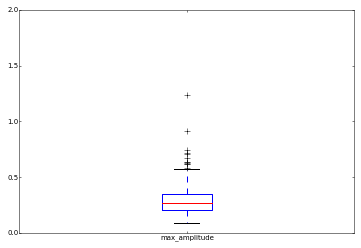

In [8]:
amplitude.plot(kind='box', ylim=(0,2))

In [ ]:
runing = np.array(imExpGroup.velocity_dataframe)

In [9]:
auc = ca.calc_transient_auc(imExpGroup, channel='Ch2')

In [10]:
auc.head()

,roi,trial,trans_idx,AUC
0,<ROI: label=1540946742427>,[],0,0.187197
1,<ROI: label=1540946742427>,[],1,0.225472
2,<ROI: label=1540946742427>,[],2,0.265116
3,<ROI: label=1540946742427>,[],3,0.695506
4,<ROI: label=1540946742427>,[],4,0.541248


In [37]:
auc2 = auc.drop(['trans_idx'], axis=1)

In [39]:
auc2.head()

,roi,trial,AUC
0,<ROI: label=1540946742427>,[],0.187197
1,<ROI: label=1540946742427>,[],0.225472
2,<ROI: label=1540946742427>,[],0.265116
3,<ROI: label=1540946742427>,[],0.695506
4,<ROI: label=1540946742427>,[],0.541248


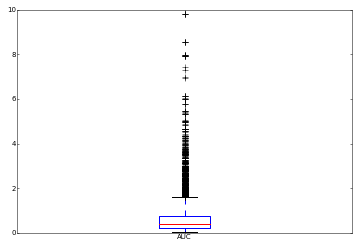

In [40]:
auc2.plot(kind='box')

### Calculating the AUC on the entire signal during running 

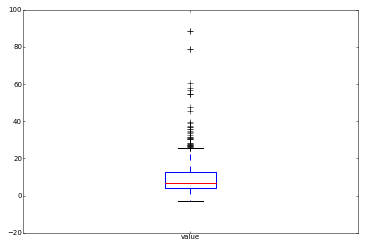

In [23]:
# running
auc_running = ia.population_activity_new(imExpGroup, "auc", interval='running')
auc_running.plot(kind='box')

In [26]:
auc_running.head()

,trial,roi,value
0,[],<ROI: label=1540946742427>,8.115292
1,[],<ROI: label=1540946755275>,5.975140
2,[],<ROI: label=1540946764969>,2.481729
3,[],<ROI: label=1540946776027>,14.679916
4,[],<ROI: label=1540946789346>,15.694689


In [30]:
auc_running['trial'][0]

<  Trial: gtr6_a1, filename = /data/gergely/BehaviorData/gtr6_a1/gtr6_a1_20180804190054.csv, time = 2018-08-04-19h00m54s>

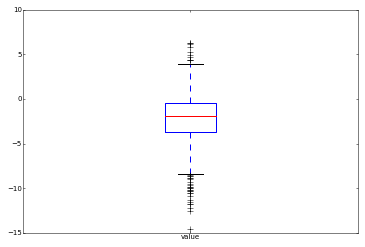

In [22]:
# running
auc_stationary = ia.population_activity_new(imExpGroup, "auc", interval='non-running')
auc_stationary.plot(kind='box')

### something is not OK with this code. it returns a way bigger df than the sum of the two. try stack maybe? -- See number of transient below for correct calc.

In [33]:
auc_data = auc_running.merge(auc_stationary, on='trial')
auc_data.head()

,trial,roi_x,value_x,roi_y,value_y
0,[],<ROI: label=1540946742427>,8.115292,<ROI: label=1540946742427>,-1.319859
1,[],<ROI: label=1540946742427>,8.115292,<ROI: label=1540946755275>,0.165245
2,[],<ROI: label=1540946742427>,8.115292,<ROI: label=1540946764969>,-1.012167
3,[],<ROI: label=1540946742427>,8.115292,<ROI: label=1540946776027>,0.479716
4,[],<ROI: label=1540946742427>,8.115292,<ROI: label=1540946789346>,-0.626212


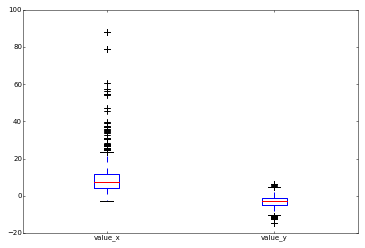

In [35]:
auc_data.plot(kind='box')

### Calculating AUC on the transients during running vs. non-running.

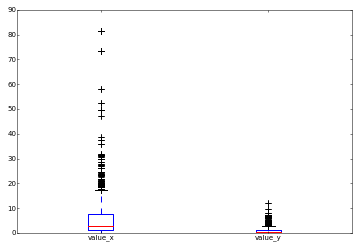

In [37]:
transient_auc_running = ia.population_activity_new(imExpGroup, "transient auc",
                                                   interval='running')
transient_auc_stationary = ia.population_activity_new(imExpGroup, "transient auc",
                                                       interval='non-running')
transient_auc_data = transient_auc_running.merge(transient_auc_stationary, on='trial')
transient_auc_data.plot(kind='box')

## Calculating normalized AUC on the transients during running vs. non-running.
### Total area under curve of transients during interval normalized to length of interval

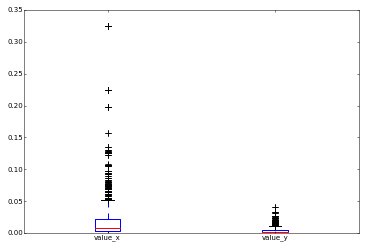

In [61]:
normtransient_auc_running = ia.population_activity_new(imExpGroup, "norm transient auc",
                                                   interval='running')
normtransient_auc_stationary = ia.population_activity_new(imExpGroup, "norm transient auc",
                                                       interval='non-running')
normtransient_auc_data = normtransient_auc_running.merge(normtransient_auc_stationary,
                                                     on='trial')
normtransient_auc_data.plot(kind='box')

## Calculating AUC on the transients during running vs. non-running.
### Total area under curve of transients that peak during interval

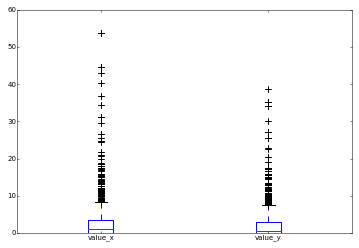

In [62]:
transient_auc2_running = ia.population_activity_new(imExpGroup, "transient auc2",
                                                   interval='running')
transient_auc2_stationary = ia.population_activity_new(imExpGroup, "transient auc2",
                                                       interval='non-running')
transient_auc2_data = transient_auc2_running.merge(transient_auc2_stationary,
                                                     on='trial')
transient_auc2_data.plot(kind='box')

## Calculating MEAN on the df/f during running vs. non-running.

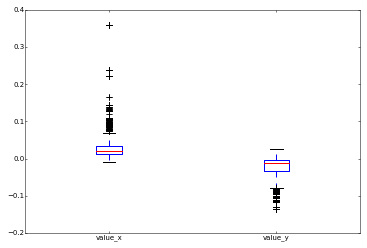

In [70]:
mean_running = ia.population_activity_new(imExpGroup, "mean",
                                                   interval='running')
mean_stationary = ia.population_activity_new(imExpGroup, "mean",
                                                       interval='non-running')
mean_data = mean_running.merge(mean_stationary, on='trial')
mean_data.plot(kind='box')

## Calculating frequency of the transients running vs. non-running.

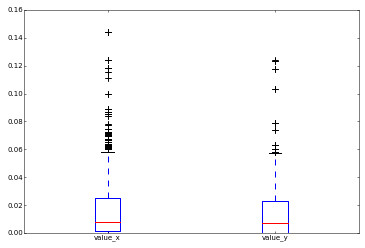

In [71]:
freq_running = ia.population_activity_new(imExpGroup, "frequency",
                                                   interval='running')
freq_stationary = ia.population_activity_new(imExpGroup, "frequency",
                                                       interval='non-running')
freq_data = freq_running.merge(freq_stationary, on='trial')
freq_data.plot(kind='box')

## Calculating number of transients during running vs. non-running.

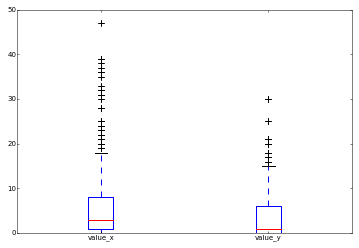

In [7]:
nTrans_running = ia.population_activity_new(imExpGroup, "n transients",
                                                   interval='running')
nTrans_stationary = ia.population_activity_new(imExpGroup, "n transients",
                                                       interval='non-running')
nTrans_data = nTrans_running.merge(nTrans_stationary, on='trial', how='inner')
nTrans_data.plot(kind='box')

In [20]:
# copy dataset to play with
testCopy = nTrans_running.copy()

,trial,roi,value
0,[],<ROI: label=1540946742427>,14
1,[],<ROI: label=1540946755275>,21
2,[],<ROI: label=1540946764969>,8
3,[],<ROI: label=1540946776027>,22
4,[],<ROI: label=1540946789346>,20


## This looks good!

In [77]:
transientsRun = nTrans_running.copy()
transientsStill = nTrans_stationary.copy()
transientsRun['mouseID']=map(lambda id: id.parent.parent.get('mouseID'),
                             transientsRun['trial'])
transientsStill['mouseID']=map(lambda id: id.parent.parent.get('mouseID'),
                              transientsStill['trial'])
runstate = 'running'
stillstate = 'standing'
transientsRun['state']=runstate
transientsStill['state']=stillstate

In [78]:
allTransients = pd.concat([transientsRun, transientsStill], axis=0)
allTransients.tail()

,trial,roi,value,mouseID,state
737,[],<ROI: label=1544221712357>,3,gtr6_b3,standing
738,[],<ROI: label=1544221752042>,3,gtr6_b3,standing
739,[],<ROI: label=1544221769764>,3,gtr6_b3,standing
740,[],<ROI: label=1544221782534>,3,gtr6_b3,standing
741,[],<ROI: label=1544221793469>,3,gtr6_b3,standing


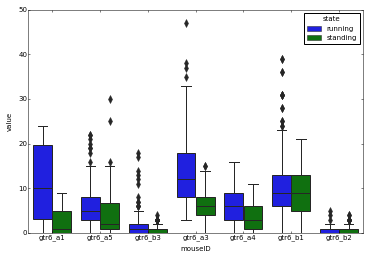

In [79]:
sns.categorical.boxplot(x=allTransients['mouseID'], y=allTransients['value'],
                        hue="state", data=allTransients)

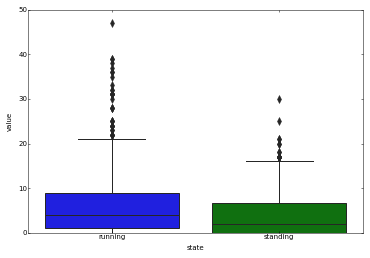

In [80]:
sns.categorical.boxplot(x=allTransients['state'], y=allTransients['value'],
                       data=allTransients)

In [100]:
cat1 = transientsRun['value']
cat2 = transientsStill['value']

# T test on number of transients
print(ttest_ind(cat1, cat2))

# Mann-Whitney test (data is not normally distributed)
print(mannwhitneyu(cat1, cat2))

Ttest_indResult(statistic=6.8546419690797382, pvalue=1.0456068732525915e-11)
MannwhitneyuResult(statistic=227011.0, pvalue=1.5821730241076597e-09)


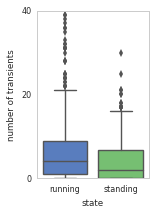

In [130]:
context = sns.plotting_context(context='paper', font_scale=1)
style = sns.axes_style(style='whitegrid')
color = sns.color_palette(palette='muted')
sns.set(context, style, color)
plt.figure(figsize=(2,3))
ax = sns.categorical.boxplot(x=allTransients['state'], y=allTransients['value'],
                       data=allTransients)
ax.set(ylabel="number of transients")
ax.set_ylim(0,40)
ax.set_yticks(ticks=[0,20,40])
ax.grid(b=False)

plt.savefig('/data/gergely/Summaries/_raphe/locomotion/gtr6Cohort_numTransients.pdf',
            dpi=300, format='pdf', transparent=True,)

In [124]:
pwd

u'/home/gergely/code/analysis/analysis-scripts'

In [23]:
trial1 = testCopy['trial'][0]

In [37]:
trial1.parent.parent.get('mouseID')

'gtr6_a1'

In [39]:
testCopy['mouseID']=map(lambda id: id.parent.parent.get('mouseID'), testCopy['trial'])

In [47]:
# testCopy.rename(columns={'value':'running_value'}, inplace=True)

In [59]:
state = 'runnig'
testCopy['state']=state

In [60]:
testCopy

,trial,roi,running_value,mouseID,state
0,[],<ROI: label=1540946742427>,14,gtr6_a1,runnig
1,[],<ROI: label=1540946755275>,21,gtr6_a1,runnig
2,[],<ROI: label=1540946764969>,8,gtr6_a1,runnig
3,[],<ROI: label=1540946776027>,22,gtr6_a1,runnig
4,[],<ROI: label=1540946789346>,20,gtr6_a1,runnig
5,[],<ROI: label=1540946807009>,2,gtr6_a1,runnig
6,[],<ROI: label=1540946867864>,3,gtr6_a1,runnig
7,[],<ROI: label=1540946882001>,10,gtr6_a1,runnig
8,[],<ROI: label=1540946901546>,4,gtr6_a1,runnig
9,[],<ROI: label=1540946932292>,10,gtr6_a1,runnig


mouseID
gtr6_a1    Axes(0.125,0.125;0.775x0.775)
gtr6_a3    Axes(0.125,0.125;0.775x0.775)
gtr6_a4    Axes(0.125,0.125;0.775x0.775)
gtr6_a5    Axes(0.125,0.125;0.775x0.775)
gtr6_b1    Axes(0.125,0.125;0.775x0.775)
gtr6_b2    Axes(0.125,0.125;0.775x0.775)
gtr6_b3    Axes(0.125,0.125;0.775x0.775)
Name: running_value, dtype: object

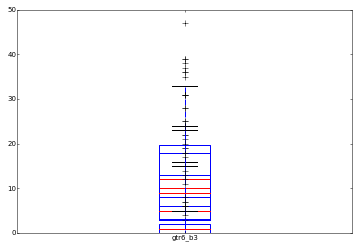

In [55]:
test = testCopy.set_index('mouseID')
test.groupby('mouseID')['running_value'].plot(kind='box')

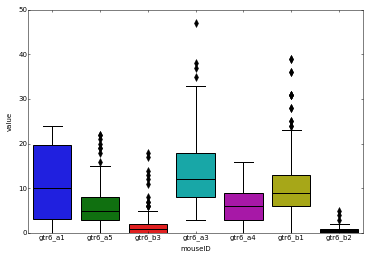

In [46]:
sns.categorical.boxplot(x=testCopy['mouseID'], y=testCopy['value'])

In [15]:
nTrans_running["trial"][1]

<  Trial: gtr6_a1, filename = /data/gergely/BehaviorData/gtr6_a1/gtr6_a1_20180804190054.csv, time = 2018-08-04-19h00m54s>

In [11]:
nTrans_data.describe()
# nTrans_data.tail()

,value_x,value_y
count,9716.000000,9716.000000
mean,5.522231,3.682277
std,6.934472,4.946239
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.000000
75%,8.000000,6.000000
max,47.000000,30.000000


In [10]:
nTrans_stationary.isna().sum()

trial    0
roi      0
value    0
dtype: int64

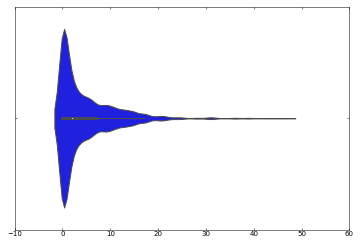

In [84]:
sns.violinplot(nTrans_data[['value_x', 'value_y']])
# plt.violinplot(nTrans_data[['value_x', 'value_y']])

In [8]:
# T test on number of transients
cat1 = nTrans_data['value_x']
cat2 = nTrans_data['value_y']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=21.292451517141238, pvalue=1.824103078110937e-99)

In [9]:
# Mann-Whitney test (data is not normally distributed)
mannwhitneyu(cat1, cat2)

MannwhitneyuResult(statistic=38802131.0, pvalue=3.849167718794144e-106)

In [92]:
print(len(cat1))
print(len(cat2))

9716
9716


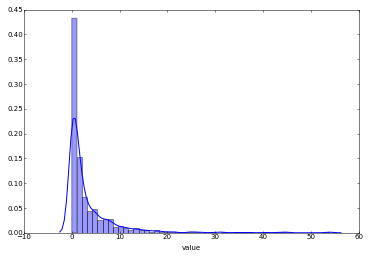

In [68]:
sns.distplot(transient_auc2_running['value'], kde=True)

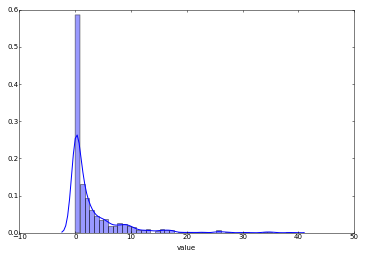

In [69]:
sns.distplot(transient_auc2_stationary['value'], kde=True)

### TTest stats on the data

In [52]:
# on df/f signal
cat1 = auc_data['value_x']
cat2 = auc_data['value_y']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=123.19668424807904, pvalue=0.0)

In [57]:
cat11 = transient_auc_data['value_x']
cat22 = transient_auc_data['value_y']

9716

In [54]:
ttest_ind(cat11, cat22)

Ttest_indResult(statistic=nan, pvalue=nan)